# Penalized regressions and sparse hedging for minimum variance portfolios

Possible applications of "regularization" for linear models:

- Improve the *robustness* of factor-based predictive regressions
- Fuel an allocation scheme (Han et al., 2019; Rapach and Zhou, 2019)
- Improve the quality of mean-variance driven portfolio weights (Stevens, 1998)
- General idea: remove noises (at the cost of a possible bias)

## Penalized Regressions

### Simple Regressions

The classical linear function: $\boldsymbol{y}=\boldsymbol{X}\boldsymbol{\beta}+\boldsymbol{\varepsilon}$. 

The best choice of $\boldsymbol{\varepsilon}$ is naturally the one that *minimizes the error*. A general idea is to minimize the *square errors*: $L=\boldsymbol{\varepsilon}^{'}\boldsymbol{\varepsilon}=\sum_i \varepsilon_i^2$. The loss $L$ is called the sum of squared residuals (*SSR*). Take partial differentiation to get
\begin{align*}
\nabla_{\boldsymbol{\beta}} L&=\frac{\partial}{\partial \boldsymbol{\beta}}(\textbf{y}-\textbf{X}\boldsymbol{\beta})'(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})=\frac{\partial}{\partial \boldsymbol{\beta}}[\boldsymbol{\beta}'\boldsymbol{X}'\boldsymbol{X}\boldsymbol{\beta}-2\boldsymbol{y}'\boldsymbol{X}\boldsymbol{\beta}] \\
&=2\boldsymbol{X}'\boldsymbol{X}\boldsymbol{\beta}  -2\boldsymbol{X}'\boldsymbol{y}
\end{align*}
so that the first order condition $\nabla_{\boldsymbol{\beta}}=\boldsymbol{0}$ is satisfied if $$\boldsymbol{\beta}^*=(\boldsymbol{X}'\boldsymbol{X})^{-1}\boldsymbol{X}'\boldsymbol{y}$$
which is known as the **standard ordinary least squares (OLS)** solution of the linear model. Two issues:

- Matrix $\boldsymbol{X}$ with dimensions $I\times K$. $\boldsymbol{X}'\boldsymbol{X}$ can only be inverted if $I$ (*nbs. of rows*) is strictly superior to $K$ (*nbs. of columns*). If there are more predictors than instances then there is no unique value of $\boldsymbol{\beta}$ that minimizes the loss.
- If $\boldsymbol{X}'\boldsymbol{X}$ is non-singular, the second order condition ensures that $\boldsymbol{\beta}^{*}$ yields a global minimum for the loss $L$.

Standard assumptions for linear models:

- $\mathbb{E}[\boldsymbol{y}|\boldsymbol{X}]=\boldsymbol{X\beta}$: **linear shape**
- $\mathbb{E}[\boldsymbol{\varepsilon}|\boldsymbol{X}]=\boldsymbol{0}$: error are **indepedent of predictors**
- $\mathbb{E}[\boldsymbol{\varepsilon}\boldsymbol{\varepsilon}'|\boldsymbol{X}]=\sigma^2 \boldsymbol{I}$: homoscedasticity - errors are uncorrelated and have identical variance
- *Supplement*: random sampling, not complete multi-collinearity, $\varepsilon_i$ normally distributed

Under these hypotheses, it's possible for us to perform statistical tests.

### Forms of Penalizations

Tibshirani (1996) proposes to estimate the following model (**LASSO**):
$$y_i = \sum_{j=1}^J \beta_j x_{i,j} + \epsilon_i, \quad i =1,\dots,I, \quad \text{s.t.} \quad \sum_{j=1}^J |\beta_j| < \delta $$
for some strictly positive constant $\delta$. Under least sqaure minimization, this amounts to solve the Lagrangian formulation:
$$\underset{\boldsymbol{\beta}}{\min} \, \left\{ \sum_{i=1}^I\left(y_i - \sum_{j=1}^J \beta_jx_{i,j} \right)^2+\lambda \sum_{j=1}^J |\beta_j| \right\}$$
for some value $\lambda>0$ which depends on $\delta$ (negatively correlated).

$L^2$ regularization (ridge regression) is similar to this and in fact anterior to LASSO:
$$\underset{\boldsymbol{\beta}}{\min} \, \left\{ \sum_{i=1}^I\left(y_i - \sum_{j=1}^J\beta_jx_{i,j} \right)^2+\lambda \sum_{j=1}^J \beta_j^2 \right\}$$
which is equivalent to estimating the following model:
$$y_i = \sum_{j=1}^J \beta_jx_{i,j} + \epsilon_i, \quad i =1,\dots,I, \quad \text{s.t.} \quad \sum_{j=1}^J \beta_j^2 < \delta$$
Their differences: LASSO will penalize some coefficients "brutally" so that they **shrink to zero quickly**, while in ridge regression, zero is only reached asymptotically. They are depicted with $K=2$ predictors by the following figure. For LASSO and ridge regression, the constraints take the shape of $|\beta_1|+|\beta_2|\leq \delta$ (a square) and $\beta_1^2+\beta_2^2\leq \delta$ so that the "error" ellipsoid in LASSO usually touches the acceptable boundary at its corner.

![Schematic view of Lasso (left) versus ridge (right) regressions](D:\mlfactor-python\images\figure5-1.png)
Both methods work when the number of exogenous variables surpasses that of observations (when classical regressions are ill-defined) since estimates in ridge regression is simply $$\hat{\boldsymbol{\beta}}=(\boldsymbol{X}'\boldsymbol{X}+\lambda \boldsymbol{I}_N)^{-1} \boldsymbol{X}'\boldsymbol{Y}$$ which ensures that the inverse matrix is well defined whenever $\lambda > 0$.

Zou and Hastie (2005) propose to benefit from the best of both worlds when **combining both penalizations in a convex manner (the elasticnet)**:
$$y_i = \sum_{j=1}^J \beta_jx_{i,j} + \epsilon_i, \quad \text{s.t.} \quad \alpha \sum_{j=1}^J |\beta_j| +(1-\alpha)\sum_{j=1}^J \beta_j^2< \delta, \quad i =1,\dots,N$$
which is associated to the optimization program
$$\underset{\boldsymbol{\beta}}{\min} \, \left\{ \sum_{i=1}^I\left(y_i - \sum_{j=1}^J\beta_jx_{i,j} \right)^2+\lambda \left(\alpha\sum_{j=1}^J |\beta_j|+ (1-\alpha)\sum_{j=1}^J \beta_j^2\right) \right\}$$
Main advantage: *maintain the selection capability of LASSO while being more effective in some cases.*

### Illustrations

In [1]:
import pandas as pd
from sklearn.linear_model import Lasso
data_ml = pd.read_pickle("./data/data_ml.pkl")

features = data_ml.columns[2:95]
y_penalized = data_ml['R1M_Usd']
x_penalized = data_ml[features].astype('float64')

fit_lasso = Lasso(alpha = 1).fit(X = x_penalized, y = y_penalized) 
fit_lasso.coef_ # alpha = 1 is too large for this case

array([-0., -0., -0.,  0., -0., -0., -0., -0., -0., -0., -0.,  0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
        0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,  0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0.,  0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0., -0., -0.,  0.,  0.,
        0.,  0.])

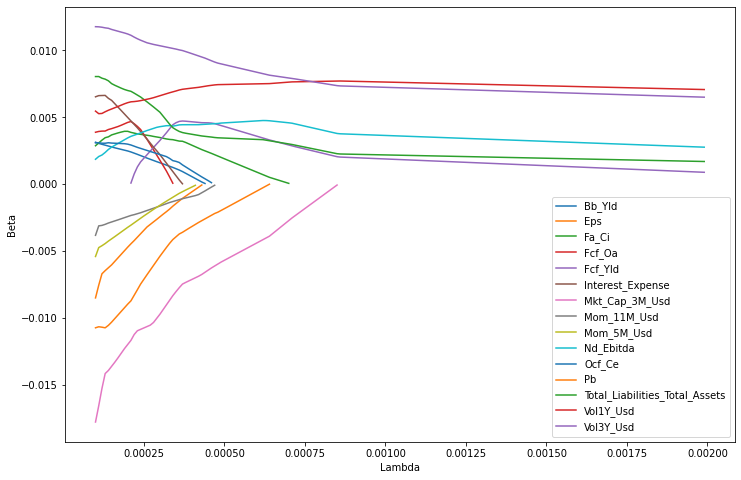

In [69]:
import numpy as np
from sklearn.linear_model import lasso_path
import matplotlib.pyplot as plt

alphas = np.arange(1e-4, 2e-3, 1e-5)
# Generate LASSO paths with different alphas
lasso_paths = lasso_path(X = x_penalized, y = y_penalized, alphas = alphas)
lasso_results = pd.DataFrame(lasso_paths[1], columns = lasso_paths[0], index = features).T.sort_index()
lasso_results.replace(0, np.nan, inplace = True)
# Select useful columns
predictors = lasso_results.abs().sum(axis = 0) > 0.05
lasso_results.loc[:, predictors].plot(figsize = (12, 8), xlabel = "Lambda", ylabel = "Beta")
plt.show()

The graph plots the evolution of coefficients as the penalization intensity ($\lambda$) increases. For some characteristics, the convergence to zero is rapid. Other variables resist the penalization longer, like `Mkt_Cap_3M_Usd`. Essentially, this means that at the first order, this variable is an important driver of future 1-month returns in our sample. Moreover, the negative sign of its coefficient is a confirmation (again, in this sample) of the size anomaly, according to which small firms experience higher future returns compared to their larger counterparts.

Next, we turn to ridge regressions.

In [72]:
from sklearn.linear_model import Ridge

n_alphas = 50
alphas = np.logspace(-3, 3, n_alphas) # Convert it into logspace!

coefs = {}
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    ridge.fit(X = x_penalized, y = y_penalized)
    coefs[alpha] = ridge.coef_

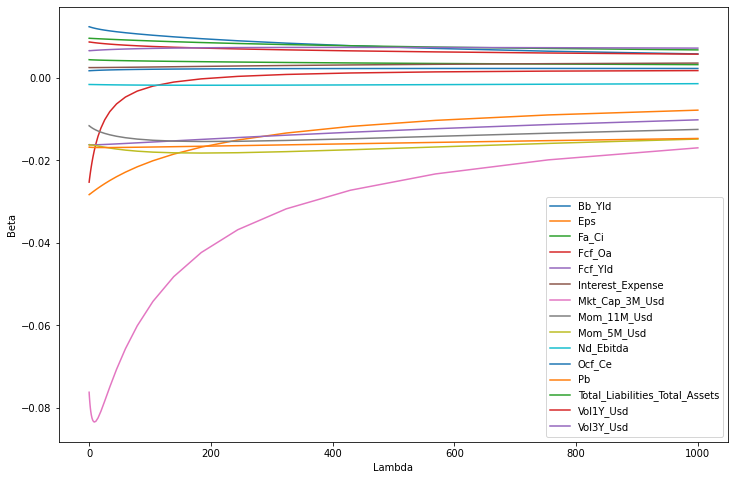

In [81]:
ridge_results = pd.DataFrame.from_dict(coefs).T
ridge_results.columns = features
# Plot the graph of the same predictors as in LASSO
ridge_results.loc[:, predictors].plot(figsize = (12, 8), xlabel = "Lambda", ylabel = "Beta")
plt.show()

In the ridge regression, the convergence to zero is much smoother. As in the previous figure, the `Mkt_Cap_3M_Usd` predictor clearly dominates, with again large negative coefficients. Nonetheless, as $\lambda$ increases, its domination over the other predictor fades. 

By definition, the elasticnet will produce curves that *behave like a blend of the two above approaches*. Nonetheless, as long as $\alpha > 0$, the *selective property of the LASSO will be preserved*: some features will see their coefficients shrink rapidly to zero. In fact, the strength of the LASSO is such that a balanced mix of the two penalizations is not reached at $\alpha=1/2$, but rather at a much smaller value (possibly below 0.1).

In [ ]:
from sklearn.linear_model import ElasticNet

alpha = 5e-4
l1_ratios = np.arange(0, 1, 0.1)

coefs = {}
for l1_ratio in l1_ratios:
    elasticnet = ElasticNet(alpha = alpha, l1_ratio = l1_ratio)
    elasticnet.fit(X = x_penalized, y = y_penalized)
    coefs[l1_ratio] = elasticnet.coef_

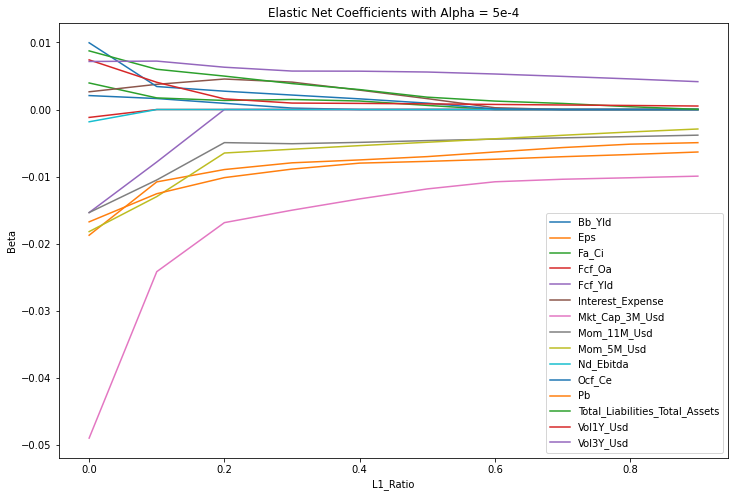

In [84]:
en_results = pd.DataFrame.from_dict(coefs).T
en_results.columns = features
# Plot the graph of the same predictors as in LASSO
en_results.loc[:, predictors].plot(figsize = (12, 8), xlabel = "L1_Ratio", ylabel = "Beta", title = "Elastic Net Coefficients with Alpha = 5e-4")
plt.show()

## Sparse Hedging for Minimum Variance Portfolios

### Presentation and Derivations

- Idea: enforce a $L^1$ norm to construct *sparse portfolios*
- Goto and Xu (2015) and Stevens (1998)

Start from the inverse covariance matrix of assets $\boldsymbol{\Sigma}^{-1}$, the maximum Sharpe Ratio portfolio is given by $$\boldsymbol{w}^{\text{MSR}}=\frac{\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}}{\boldsymbol{1}'\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}}$$
where $\boldsymbol{\mu}$ is the vector of expected (excess) returns. Taking $\boldsymbol{\mu} = \boldsymbol{1}$ yields the *minimum variance portfolio*.

Usually we estimate $\boldsymbol{\Sigma}$ first and then inverse it. We present one way to obtain $\boldsymbol{\Sigma}^{-1}$ directly. If we decompose $\boldsymbol{\Sigma}$ into
$$\boldsymbol{\Sigma}= \left[\begin{array}{cc} \sigma^2 & \boldsymbol{c}' \\
\boldsymbol{c}& \boldsymbol{C}\end{array} \right]$$
classical partitioning results (e.g., Schur complements) imply
$$\small \boldsymbol{\Sigma}^{-1}= \left[\begin{array}{cc} (\sigma^2 -\boldsymbol{c}'\boldsymbol{C}^{-1}\boldsymbol{c})^{-1} & - (\sigma^2 -\boldsymbol{c}'\boldsymbol{C}^{-1}\boldsymbol{c})^{-1}\boldsymbol{c}'\boldsymbol{C}^{-1} \\(\sigma^2 -\boldsymbol{c}'\boldsymbol{C}^{-1}\boldsymbol{c})^{-1}\boldsymbol{C}^{-1}\boldsymbol{c}& \boldsymbol{C}^{-1}+ (\sigma^2 -\boldsymbol{c}'\boldsymbol{C}^{-1}\boldsymbol{c})^{-1}\boldsymbol{C}^{-1}\boldsymbol{cc}'\boldsymbol{C}^{-1}\end{array} \right]$$
The first line: the factor $(\sigma^2 -\boldsymbol{c}'\boldsymbol{C}^{-1}\boldsymbol{c})^{-1}$ and the line vector $\boldsymbol{c}'\boldsymbol{C}^{-1}$. $\boldsymbol{C}$ is the covariance matrix of assets 2 to N and $\boldsymbol{c}$ is the covariance between the first asset and all other assets. The first line of $\boldsymbol{\Sigma}^{-1}$ is then
$$(\sigma^2 -\boldsymbol{c}'\boldsymbol{C}^{-1}\boldsymbol{c})^{-1} \left[1 \quad  \underbrace{-\boldsymbol{c}'\boldsymbol{C}^{-1}}_{N-1 \text{ terms}} \right]$$
We now consider the alternative setting by regressing the returns of the first assets on those of all other assets:
$$r_{1,t}=a_1+\sum_{n=2}^N\beta_{1|n}r_{n,t}+\epsilon_t, \quad \text{ i.e., } \quad  \boldsymbol{r}_1=a_1\boldsymbol{1}_T+\boldsymbol{R}_{-1}\boldsymbol{\beta}_1+\epsilon_1$$
where $\boldsymbol{R}_{-1}$ gathers the returns of all assets except the first one. The OLS estimator for $\beta_1$ is $$\hat{\beta}_1=\boldsymbol{C}^{-1}\boldsymbol{c}$$
and this is the partitioned form (when a constant is included to the regression) stemming from the Frisch-Waugh-Lovell theorem (Greene, 2018). In addition, $$(1-R^2)\sigma_{\boldsymbol{r}_1}^2=\sigma_{\boldsymbol{r}_1}^2- \boldsymbol{c}'\boldsymbol{C}^{-1}\boldsymbol{c} =\sigma^2_{\epsilon_1}$$ **Proof.** With $\boldsymbol{X}$ being the concatenation of $\boldsymbol{1}_T$ with returns $\boldsymbol{R}_{-1}$ and with $\boldsymbol{y}=\boldsymbol{r}_1$, the classical expression of $R^2$ is
$$R^2=1-\frac{\boldsymbol{\epsilon}'\boldsymbol{\epsilon}}{T\sigma_Y^2}=1-\frac{\boldsymbol{y}'\boldsymbol{y}-\hat{\boldsymbol{\beta}'}\boldsymbol{X}'\boldsymbol{X}\hat{\boldsymbol{\beta}}}{T\sigma_Y^2}=1-\frac{\boldsymbol{y}'\boldsymbol{y}-\boldsymbol{y}'\boldsymbol{X}\hat{\boldsymbol{\beta}}}{T\sigma_Y^2}$$
with fitted values $\boldsymbol{X}\hat{\beta}=\hat{a}_1\boldsymbol{1}_T+\boldsymbol{R}_{-1}\boldsymbol{C}^{-1}\boldsymbol{c}$. Hence,
\begin{align*}
T\sigma_{\boldsymbol{r}_1}^2R^2&=T\sigma_{\boldsymbol{r}_1}^2-\boldsymbol{r}'_1\boldsymbol{r}_1+\hat{a}_1\boldsymbol{1}'_T\boldsymbol{r}_1+\boldsymbol{r}'_1\boldsymbol{R}_{-1}\boldsymbol{C}^{-1}\boldsymbol{c} \\
T(1-R^2)\sigma_{\boldsymbol{r}_1}^2&=\boldsymbol{r}'_1\boldsymbol{r}_1-\hat{a}_1\boldsymbol{1}'_T\boldsymbol{r}_1-\left(\boldsymbol{\tilde{r}}_1+\frac{\boldsymbol{1}_T\boldsymbol{1}'_T}{T}\boldsymbol{r}_1\right)'\left(\tilde{\boldsymbol{R}}_{-1}+\frac{\boldsymbol{1}_T\boldsymbol{1}'_T}{T}\boldsymbol{R}_{-1}\right)\boldsymbol{C}^{-1}\boldsymbol{c} \\
T(1-R^2)\sigma_{\boldsymbol{r}_1}^2&=\boldsymbol{r}'_1\boldsymbol{r}_1-\hat{a}_1\boldsymbol{1}'_T\boldsymbol{r}_1-T\boldsymbol{c}'\boldsymbol{C}^{-1}\boldsymbol{c} -\boldsymbol{r}'_1\frac{\boldsymbol{1}_T\boldsymbol{1}'_T}{T}\boldsymbol{R}_{-1} \boldsymbol{C}^{-1}\boldsymbol{c} \\
T(1-R^2)\sigma_{\boldsymbol{r}_1}^2&=\boldsymbol{r}'_1\boldsymbol{r}_1-\frac{(\boldsymbol{1}'_T\boldsymbol{r}_1)^2}{T}- T\boldsymbol{c}'\boldsymbol{C}^{-1}\boldsymbol{c} \\
(1-R^2)\sigma_{\boldsymbol{r}_1}^2&=\sigma_{\boldsymbol{r}_1}^2- \boldsymbol{c}'\boldsymbol{C}^{-1}\boldsymbol{c} 
\end{align*}
where in the fourth equality we have plugged $\hat{a}_1=\dfrac{\boldsymbol{1'}_T}{T}(\boldsymbol{r}_1-\boldsymbol{R}_{-1}\boldsymbol{C}^{-1}\boldsymbol{c})$. The proof can also be done heuristically.

Combining previous formulas, we get the first line of $\boldsymbol{\Sigma}^{-1}$ to be $$\frac{1}{\sigma^2_{\epsilon_1}}\times \left[ 1 \quad  -\hat{\boldsymbol{\beta}}_1'\right]$$
Given the first line of $\boldsymbol{\Sigma}^{-1}$, it suffices to multiply by $\boldsymbol{\mu}$ to get the portfolio weight in the *first* asset.

The economic intuition behind it is very nice. Take the previous case as an example. The portfolio has a unit position in the first asset and $-\hat{\boldsymbol{\beta}}_1$ positions in other assets. They are to *hedge* the return of the first one. The scaling factor $\sigma_{\epsilon_1}^2$ measures *how much we trust the regression output*. The more we trust, the more we invest in the hedging portfolio.

This reasoning is easily generalized for any line of $\boldsymbol{\Sigma}^{-1}$, which can be obtained by regressing the returns of asset $i$ on the returns of all other assets. Given values of $\boldsymbol{\mu}$, the procedure is roughly the following. At each date, **For all stocks $i$**,

1. Estimate the *elasticnet* regression over $t=1,\dots,T$ samples to get the $i^{th}$ line of $\hat{\Sigma}^{-1}$:
$$\small \left[\hat{\mathbf{\Sigma}}^{-1}\right]_{i,\cdot}= \underset{\mathbf{\beta}_{i|}}{\text{argmin}}\, \left\{\sum_{t=1}^T\left( r_{i,t}-a_i+\sum_{n\neq i}^N\beta_{i|n}r_{n,t}\right)^2+\lambda \alpha ||  \mathbf{\beta}_{i|}||_1+\lambda (1-\alpha)||\mathbf{\beta}_{i|}||_2^2\right\}$$
2. To get the weights of asset $i$, we compute the $\mu$-weighted sum: $w_i= \sigma_{\epsilon_i}^{-2}\left(\mu_i- \sum_{j\neq i}\mathbf{\beta}_{i|j}\mu_j\right)$.

We recall that the vectors $\mathbf{\beta}_{i|}=[\mathbf{\beta}_{i|1},\dots,\mathbf{\beta}_{i|i-1},\mathbf{\beta}_{i|i+1},\dots,\mathbf{\beta}_{i|N}]$ are the coefficients from regressing the returns of asset $i$ against the returns of all other assets.

The introduction of **penalization norms** are beneficial twofold:

- Robustness: estimates are less subject to error in $\mu$
- Less Transaction Costs: portfolios are sparse
- You may refer to Friedman et al. (2008) for GLASSO

### Example

The vector of expected returns can be very noisy, so we can simply adopt an agnostic view by setting $\boldsymbol{\mu}=\boldsymbol{1}$.

We will apply some techniques in Chapter 12 and analysize sparse portfolios based on returns (at the end of Chapter 1).

Then, we initialize the output variables: portfolio weights and portfolio returns. We want to compare three strategies: an equally weighted (EW) benchmark of all stocks, the classical global minimum variance portfolio (GMV) and the sparse-hedging approach to minimum variance.

In [2]:
# Generate Returns
stock_days = data_ml[['date', 'stock_id']].groupby('stock_id').count()
stock_ids = stock_days[stock_days['date'] == max(stock_days['date'])].index
sub_data_ml = data_ml[data_ml['stock_id'].isin(stock_ids)]
returns = sub_data_ml.pivot(index = "date", columns = "stock_id", values = "R1M_Usd")
returns

stock_id,1,3,4,7,9,11,12,16,17,18,...,1199,1200,1201,1202,1203,1204,1208,1209,1210,1212
date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,-0.036,0.077,-0.016,-0.009,0.032,0.144,-0.110,-0.191,-0.103,0.098,...,-0.509,0.039,-0.011,-0.019,0.168,0.080,-0.372,-0.560,-0.006,-0.186
2000-02-29,0.263,-0.024,0.000,0.027,0.076,0.258,0.110,0.197,-0.053,-0.001,...,-0.147,0.017,-0.148,0.118,0.177,0.161,0.143,-0.102,-0.057,0.104
2000-03-31,0.031,0.018,0.153,0.000,-0.025,0.049,0.134,-0.030,0.074,-0.002,...,0.083,0.006,-0.025,-0.009,0.237,-0.008,0.057,0.144,0.085,-0.143
2000-04-30,0.448,0.027,-0.011,-0.017,-0.022,0.014,0.022,0.161,0.051,-0.037,...,-0.192,0.003,-0.061,0.053,-0.097,-0.114,0.070,-0.103,0.073,0.204
2000-05-31,-0.097,0.050,0.014,0.018,-0.121,-0.116,-0.038,-0.020,0.038,-0.131,...,-0.279,0.014,0.118,0.089,-0.023,-0.089,-0.137,0.113,0.016,0.042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31,-0.002,-0.049,0.036,-0.068,-0.028,0.146,0.040,0.016,0.297,0.025,...,-0.006,-0.005,-0.048,-0.010,0.037,0.005,0.126,-0.009,-0.011,0.044
2018-09-30,-0.155,-0.070,-0.025,-0.052,-0.098,-0.291,-0.044,-0.050,-0.150,-0.135,...,-0.064,-0.013,-0.070,-0.024,-0.030,-0.161,-0.119,0.000,0.028,-0.266
2018-10-31,0.014,0.036,0.000,0.007,-0.018,-0.100,0.074,0.094,-0.081,0.074,...,-0.075,0.068,0.051,0.078,-0.005,0.107,0.205,0.076,0.063,0.013


In [3]:
import numpy as np
separation_date = pd.to_datetime('2014-01-15')
t_oos = returns[returns.index > separation_date].index.unique()
Tt = len(t_oos)
nb_port = 3
portf_weights = np.zeros(shape = (Tt, nb_port, len(returns.columns)))
portf_returns = np.zeros(shape = (Tt, nb_port))

Next, because it is the purpose of this section, we isolate the computation of the weights of sparse-hedging portfolios. In the case of minimum variance portfolios, when $\boldsymbol{\mu}=\boldsymbol{1}$, the weight in asset 1 will simply be the sum of all terms in $\dfrac{1}{\sigma^2_{\epsilon_1}}\times \left[ 1 \quad  -\hat{\boldsymbol{\beta}}_1'\right]$ and the other weights have similar forms.

In [4]:
from sklearn.linear_model import ElasticNet
def weights_sparsehedge(returns: pd.DataFrame, l1_ratio, alpha):
    weights = []
    # def elasticnet_fit(y: pd.Series):
    #     x = returns.drop(columns = y.name)
    #     fit = ElasticNet(alpha = alpha, l1_ratio = l1_ratio).fit(x, y)
    #     err = y - fit.predict(x)
    #     w = (1 - np.sum(fit.coef_)) / np.var(err)
    #     return w
    # weights = returns.apply(elasticnet_fit)

    # NOTE: To generate the same results as R, you may have to specify some of the parameters in ElasticNet
    # By default, glmnet in R standardizes the variables
    # See https://stats.stackexchange.com/questions/206898/difference-between-elasticnet-in-scikit-learn-python-and-glmnet-in-r
    for col in returns.columns:
        y = returns[col]
        x = returns.drop(columns = col)
        fit = ElasticNet(alpha = alpha, l1_ratio = l1_ratio, selection = "random").fit(x, y)
        err = y - fit.predict(x)
        w = (1 - np.sum(fit.coef_)) / np.var(err)
        weights.append(w)
    weights = np.array(weights)
    return weights / np.sum(weights)

In [10]:
def weights_multi(returns: pd.DataFrame, j, l1_ratio, alpha):
    N = len(returns.columns)
    if(j == 0): # EW
        return np.repeat([1/N], N)
    if(j == 1): # Minimum Variance
        sigma = np.cov(returns.T) + 0.01 * np.identity(N)
        w = np.dot(np.linalg.inv(sigma), np.repeat([1], N))
        return w / np.sum(w)
    if(j == 2): # Penalised / Elasticnet
        return weights_sparsehedge(returns, l1_ratio, alpha)

Finally, we proceed to the backtesting loop. Given the number of assets, the execution of the loop takes a few minutes. At the end of the loop, we compute the standard deviation of portfolio returns (monthly volatility). This is the key indicator as minimum variance seeks to minimize this particular metric.

In [19]:
for t in range(Tt):
    tmp_data = returns[returns.index < t_oos[t]]
    realised_returns = returns[returns.index == t_oos[t]]

    for j in range(nb_port):
        portf_weights[t][j] = weights_multi(tmp_data, j, 0.1, 0.1)
        portf_returns[t][j] = (portf_weights[t][j] * realised_returns).values.sum()

portf_returns_df = pd.DataFrame(portf_returns, columns = ['EW', 'MV', 'Sparse'])
portf_returns_df.head()

,EW,MV,Sparse
0,0.040376,0.023471,0.033863
1,0.010201,0.024502,0.015676
2,-0.003725,0.005594,0.000557
3,0.011663,0.025922,0.010534
4,0.033970,0.016944,0.030183


In [20]:
portf_returns_df.std()

EW        0.041804
MV        0.033504
Sparse    0.034882
dtype: float64

The aim of the sparse hedging restrictions is to *provide a better estimate of the covariance structure of assets so that the estimation of minimum variance portfolio weights is more accurate.* From the above exercise, we see that the monthly volatility is indeed reduced when building covariance matrices based on sparse hedging relationships. This is not the case if we use the shrunk sample covariance matrix because there is probably too much noise in the estimates of correlations between assets. Working with daily returns would likely improve the quality of the estimates. But the above backtest shows that the penalized methodology performs well even when the number of observations (dates) is small compared to the number of assets.

## Predictive Regressions

### Literature Review and Principle

- Stambaugh (1999), etc.: OLS estimate of autocorrelated indepedent variables are *biased*
- Dangl and Halling (2012), Kelly et al. (2019), ...: time-dependence of the coefficients in predictive regressions
- Rapach et al. (2013), Han et al. (2019) and Rapach and Zhou (2019), etc.: Penalization with predictive regressions to improve forecast combinations and single out important characteristics

A generalized predictive linear relationship with penalization terms:
$$r_{t+1,n} = \alpha_n + \sum_{k=1}^K\beta_n^kf^k_{t,n}+\epsilon_{t+1,n}, \quad \text{s.t.} \quad (1-\alpha)\sum_{j=1}^J |\beta_j| +\alpha\sum_{j=1}^J \beta_j^2< \theta$$
where we use $f_{t,n}^k$ or $x_{t,n}^k$ interchangeably and $\theta$ is some penalization intensity. The aim of regularization is to generate more robust estimates. If the patterns hold out of sample, then $$\hat{r}_{t+1,n}=\hat{\alpha}_n+\sum_{k=1}^K \hat{\beta}_n^k f_{t,n}^k$$ will be a relatively reliable proxy of future performance.

### Code and Results

In [4]:
from sklearn.linear_model import ElasticNet
separation_date = pd.to_datetime('2014-01-15')
training_sample = data_ml[data_ml['date'] < separation_date]

y_penalized_train = training_sample['R1M_Usd']
x_penalized_train = training_sample[features]

fit_pen_pred = ElasticNet(alpha = 0.1, l1_ratio = 0.1).fit(x_penalized_train, y_penalized_train)

We then report two key performance measures: the mean squared error and the hit ratio, which is the proportion of times that the prediction guesses the sign of the return correctly.

In [6]:
from sklearn.metrics import mean_squared_error
test_sample = data_ml[data_ml['date'] > separation_date]
x_penalized_test = test_sample[features]
y_penalized_test = test_sample['R1M_Usd']
mse = mean_squared_error(y_penalized_test, fit_pen_pred.predict(x_penalized_test))
mse

0.03699695809185004

In [9]:
import numpy as np
hit_ratio = np.mean(fit_pen_pred.predict(x_penalized_test) * y_penalized_test > 0)
hit_ratio

0.5460346399270738

- RMSE can be difficult to interpret: complicated to map them mentally to some intuitive financial indicator
- Hit ratio: natural, proportion of correct *signs* achieved by predictions, 0.546 can be good (but not impressive)

## Coding Exercise
On the test sample, evaluate the impact of the two elastic net parameters on out-of-sample accuracy.

In [26]:
def eval_elasticnet_prediction(data, separation_date, alpha, l1_ratio):
    training_sample = data[data['date'] < separation_date]
    test_sample = data[data['date'] > separation_date]

    y_penalized_train = training_sample['R1M_Usd']
    x_penalized_train = training_sample[features]

    fit_pen_pred = ElasticNet(alpha = alpha, l1_ratio = l1_ratio).fit(x_penalized_train, y_penalized_train)

    x_penalized_test = test_sample[features]
    y_penalized_test = test_sample['R1M_Usd']
    mse = mean_squared_error(y_penalized_test, fit_pen_pred.predict(x_penalized_test))
    hit_ratio = np.mean(fit_pen_pred.predict(x_penalized_test) * y_penalized_test > 0)
    return {'alpha': alpha, 'l1_ratio': l1_ratio, 'MSE': mse, 'Hit Ratio': hit_ratio}

In [16]:
eval_elasticnet_prediction(data_ml, separation_date, alpha = 0.1, l1_ratio = 0.1)

{'alpha': 0.1,
 'l1_ratio': 0.1,
 'MSE': 0.03699695809185004,
 'Hit Ratio': 0.5460346399270738}

In [27]:
eval_elasticnet_prediction(data_ml, separation_date, alpha = 0.001, l1_ratio = 0.1)

{'alpha': 0.001,
 'l1_ratio': 0.1,
 'MSE': 0.03702584804370461,
 'Hit Ratio': 0.5303669097538742}

In [29]:
eval_elasticnet_prediction(data_ml, separation_date, alpha = 0.001, l1_ratio = 0.05)

{'alpha': 0.001,
 'l1_ratio': 0.05,
 'MSE': 0.037034308141731254,
 'Hit Ratio': 0.5301247721057429}

In [32]:
eval_elasticnet_prediction(data_ml, separation_date, alpha = 0.01, l1_ratio = 0.05)

{'alpha': 0.01,
 'l1_ratio': 0.05,
 'MSE': 0.03698621560684778,
 'Hit Ratio': 0.543584776663628}

In [34]:
eval_elasticnet_prediction(data_ml, separation_date, alpha = 0.05, l1_ratio = 0.2)

{'alpha': 0.05,
 'l1_ratio': 0.2,
 'MSE': 0.03699695809185004,
 'Hit Ratio': 0.5460346399270738}

You can see that $\alpha=0.1$ and $\lambda =0.1$ are nearly optimal.